In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random as random
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, SMOTENC, SMOTEN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule, InstanceHardnessThreshold, ClusterCentroids
random.seed(0)
# create a KNN model for the merged_filtered_data_crc.csv file
# Load the dataset

data = pd.read_csv("merged.csv")

data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'TBL','fraction_genome_altered','aneuploidy_score','TMB'], axis=1, inplace=True)

In [48]:
def KNN2(target_variable='msi_status', test_size=0.2, random_state=42, neighbors=5, do_cross=False, do_smote=False, type_smote='SMOTE', weight='uniform'):
    y = data[target_variable]
    X = data.drop(target_variable, axis=1)
    le = LabelEncoder()
    # Fit and transform the features
    X = X.apply(le.fit_transform)
    X.head()

    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=-1, weights=weight)

    if do_cross == False:
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


        if do_smote:
            if type_smote == 'ADASYN':
                smote = ADASYN(random_state=random_state, n_jobs=-1)
            elif type_smote == 'RandomOverSampler':
                smote = RandomOverSampler(random_state=random_state)
            elif type_smote == 'KMeansSMOTE':
                smote = KMeansSMOTE(n_jobs=-1, random_state=random_state)
            elif type_smote == 'SMOTE':
                smote = SMOTE(random_state=random_state, n_jobs=-1)
            elif type_smote == 'BorderlineSMOTE':
                smote = BorderlineSMOTE(random_state=random_state, n_jobs=-1)
            elif type_smote == 'SVMSMOTE':
                smote = SVMSMOTE(random_state=random_state, n_jobs=-1)
            elif type_smote == 'SMOTEN':
                smote = SMOTEN(random_state=random_state, n_jobs=-1)
            elif type_smote == 'SMOTENC':
                smote = SMOTENC("auto", random_state=random_state, n_jobs=-1)
            else:
                print(type_smote + ' is not a valid SMOTE type')
            if type_smote != 'none':
                X_train, Y_train = smote.fit_resample(X_train, Y_train)
            
        # Train the model
        knn.fit(X_train, Y_train)
        # Make predictions on the test set
        y_pred = knn.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(Y_test, y_pred)
        return accuracy
    else: 
        # Perform cross-validation
        if do_smote:
            smote = SMOTE(random_state=random_state)
            X, y = smote.fit_resample(X, y)
        scores = cross_val_score(knn, X, y, cv=do_cross)
        # Print the cross-validation scores
        return scores.mean()

In [49]:
number_of_neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
cross_validation_list = [2, 4, 6, 8, 10]
training_size = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
all_smotes = [
    "none", 
    # "BorderlineSMOTE",
    "SMOTE",
    # "SVMSMOTE",
    # "ADASYN",
    # "KMeansSMOTE",
    # "RandomOverSampler"
]

In [50]:
baseline_accuracy_scores1 = []
baseline_kmeans_accuracy_scores1 = []
accuracy_scores_1 = []
for i in all_smotes:
    print(i)
    accuracy_scores = []
    for j in number_of_neighbors_list:
        accuracy = KNN2(neighbors=j, do_smote=True, type_smote = i, test_size=0.4)
        accuracy_scores.append(accuracy)
        if i == "none":
            baseline_accuracy_scores1.append(accuracy)
        if i == "SMOTE":
            baseline_kmeans_accuracy_scores1.append(accuracy)
    accuracy_scores_1.append((i, accuracy_scores))

none
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
SMOTE


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

In [10]:
baseline_accuracy_scores = []
baseline_kmeans_accuracy_scores = []
accuracy_scores_1 = []
for i in all_smotes:
    print(i)
    accuracy_scores = []
    for j in number_of_neighbors_list:
        accuracy = KNN2(neighbors=j, do_smote=True, type_smote = i)
        accuracy_scores.append(accuracy)
        if i == "none":
            baseline_accuracy_scores.append(accuracy)
        if i == "SMOTE":
            baseline_kmeans_accuracy_scores.append(accuracy)
    accuracy_scores_1.append((i, accuracy_scores))

none
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
none is not a valid SMOTE type
SMOTE


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

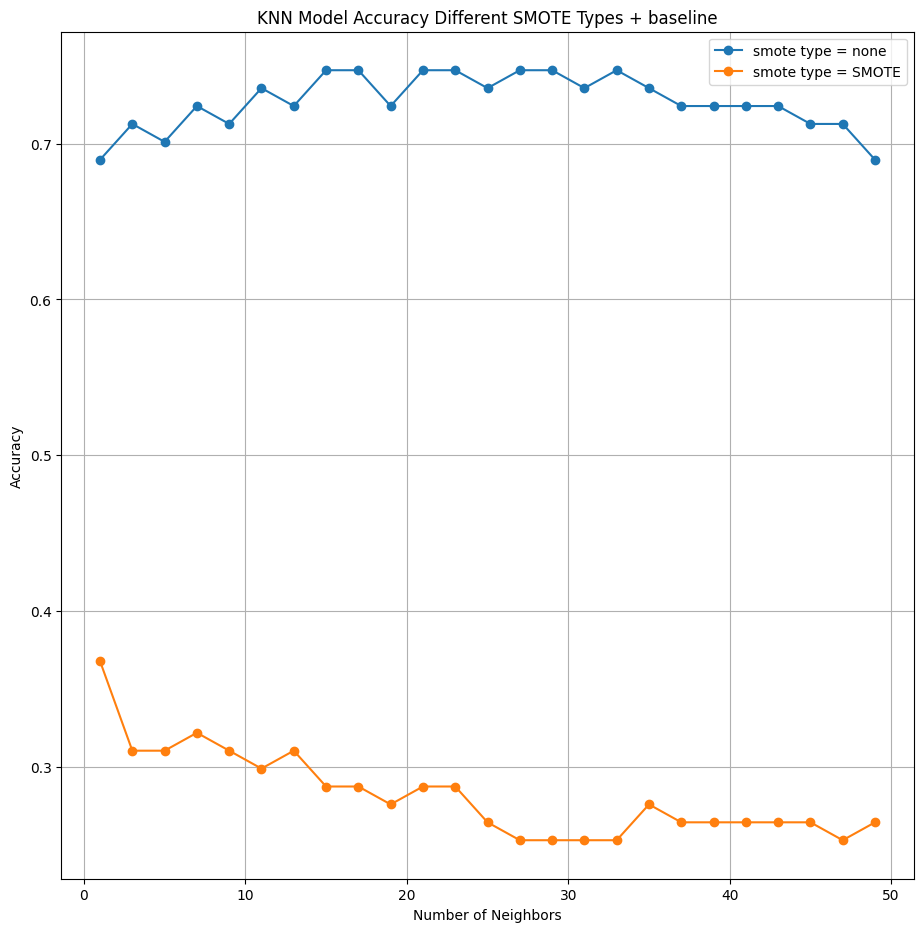

In [11]:
fig = plt.figure(figsize=(11, 11))
fig = fig.add_subplot(111)
for i in range(len(accuracy_scores_1)):
    fig.plot(number_of_neighbors_list, accuracy_scores_1[i][1], marker='o', label="smote type = {}".format(accuracy_scores_1[i][0]))
fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy Different SMOTE Types + baseline')
fig.legend()
fig.grid(True)

In [12]:
accuracy_scores_2 = []
for j in cross_validation_list:
    print("cross size = ", j)
    accuracy_scores = []
    for i in number_of_neighbors_list:
        accuracy = KNN2(neighbors=i, do_smote=True, do_cross=j)
        accuracy_scores.append(accuracy)
    accuracy_scores_2.append((j, accuracy_scores))

cross size =  2
cross size =  4
cross size =  6
cross size =  8
cross size =  10


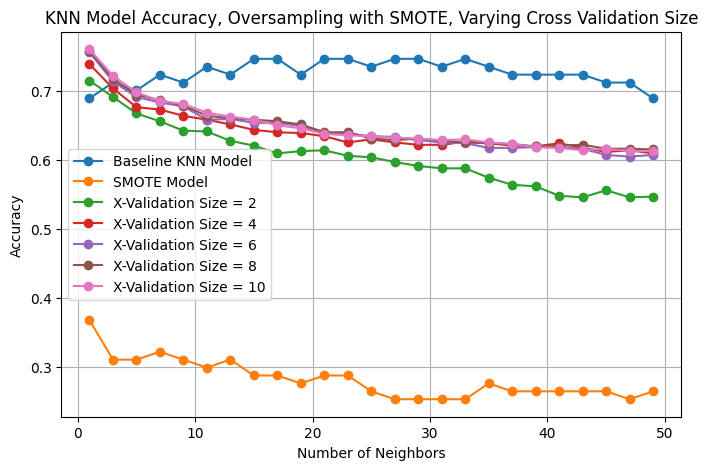

In [74]:
fig = plt.figure(figsize=(8, 5))
fig = fig.add_subplot(111)
fig.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")
fig.plot(number_of_neighbors_list, baseline_kmeans_accuracy_scores, marker='o', label="SMOTE Model")
for i in range(len(accuracy_scores_2)):
    fig.plot(number_of_neighbors_list, accuracy_scores_2[i][1], marker='o', label="X-Validation Size = {}".format(accuracy_scores_2[i][0]))

fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy, Oversampling with SMOTE, Varying Cross Validation Size')
fig.legend()
fig.grid(True)

In [51]:
accuracy_scores_3 = []
for j in training_size:
    print("test size = ", j)
    accuracy_scores = []
    for i in number_of_neighbors_list:
        accuracy = KNN2(neighbors=i, test_size=j, do_smote=True)
        accuracy_scores.append(accuracy)
    accuracy_scores_3.append((j, accuracy_scores))

test size =  0.2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

test size =  0.3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

test size =  0.4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

test size =  0.5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

test size =  0.6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

test size =  0.7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

test size =  0.8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

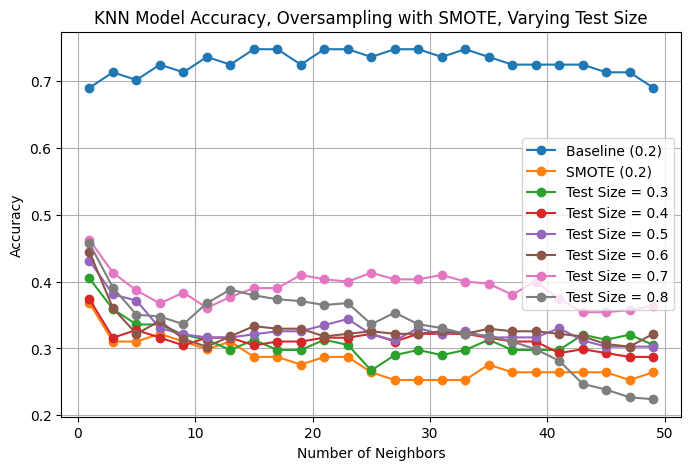

In [72]:
fig = plt.figure(figsize=(8, 5))
fig = fig.add_subplot(111)
fig.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline (0.2)")
fig.plot(number_of_neighbors_list, baseline_kmeans_accuracy_scores, marker='o', label="SMOTE (0.2)")
for i in range(len(accuracy_scores_3)):
    if accuracy_scores_3[i][0] == 0.2:
        continue
    fig.plot(number_of_neighbors_list, accuracy_scores_3[i][1], marker='o', label="Test Size = {}".format(accuracy_scores_3[i][0]))
fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy, Oversampling with SMOTE, Varying Test Size')
fig.legend()
fig.grid()

In [16]:
accuracy_scores_4 = []
for j in [0.2, 0.3, 0.4]:
    for k in [6, 8, 10]:
        for i in number_of_neighbors_list:
            accuracy = KNN2(neighbors=i, test_size=j, type_smote='SMOTE', do_cross=k)
            accuracy_scores.append(accuracy)
accuracy_scores_4.append((j, accuracy_scores))

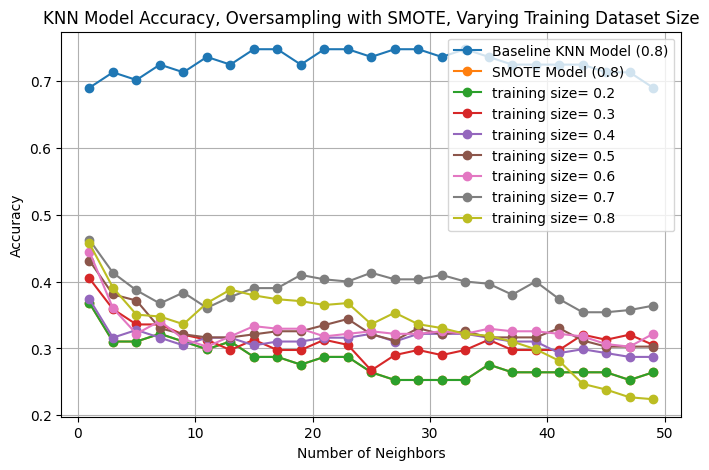

In [68]:
fig = plt.figure(figsize=(8, 5))
fig = fig.add_subplot(111)
fig.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline KNN Model (0.8)")
fig.plot(number_of_neighbors_list, baseline_kmeans_accuracy_scores, marker='o', label="SMOTE Model (0.8)")
fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy, Oversampling with SMOTE, Varying Training Dataset Size')
fig.legend()
fig.grid()
for i in range(len(accuracy_scores_3)):
    fig.plot(number_of_neighbors_list, accuracy_scores_3[i][1], marker='o', label="training size= {}".format(accuracy_scores_3[i][0]))
    fig.legend()

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 7, 11, 15, 19, 23, 27, 31, 35, 39], 
    'weights': ['uniform', 'distance'], 
    'p': [0.75, 1, 1.25, 1.5, 1.75, 2], 
    'leaf_size': [10, 20, 30, 40, 50], 
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}
target_variable = 'msi_status'
y = data[target_variable]
X = data.drop(target_variable, axis=1)
le = LabelEncoder()
# Fit and transform the features
X = X.apply(le.fit_transform)
X.head()


# Create a KNN classifier
knn = KNeighborsClassifier()


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)



smote = SMOTE(random_state=42, n_jobs=-1)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Create the grid search object
grid_search = RandomizedSearchCV(knn, param_grid, n_iter=600, cv=5, scoring='accuracy', random_state=4)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowsk

Best parameters: {'weights': 'distance', 'p': 0.75, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'brute'}
Best score: 0.7653854059609455


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
370 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

In [31]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
# Best parameters: {'weights': 'distance', 'p': 0.75, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'brute'}
# Best score: 0.7653854059609455

Best parameters: {'weights': 'distance', 'p': 0.75, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'brute'}
Best score: 0.7653854059609455


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
# Get the best parameters
best_params = grid_search.best_params_

# Create a new KNN classifier with the best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], p=best_params['p'], leaf_size=best_params['leaf_size'], algorithm=best_params['algorithm'])

# Fit the model to the data
knn_best.fit(X_train, Y_train)

# Evaluate the model
prediction = grid_search.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, prediction))

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, prediction))

# Confusion Matrix:
# [[ 9  2  2]
#  [ 3  7  4]
#  [ 8 39 13]]

# Classification Report:
#               precision    recall  f1-score   support

#        MSI-H       0.45      0.69      0.55        13
#        MSI-L       0.15      0.50      0.23        14
#          MSS       0.68      0.22      0.33        60

#     accuracy                           0.33        87
#    macro avg       0.43      0.47      0.37        87
# weighted avg       0.56      0.33      0.34        87


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(


Confusion Matrix:
[[ 9  2  2]
 [ 3  7  4]
 [ 8 39 13]]

Classification Report:
              precision    recall  f1-score   support

       MSI-H       0.45      0.69      0.55        13
       MSI-L       0.15      0.50      0.23        14
         MSS       0.68      0.22      0.33        60

    accuracy                           0.33        87
   macro avg       0.43      0.47      0.37        87
weighted avg       0.56      0.33      0.34        87



In [46]:
accuracy_scores_5 = []
for j in number_of_neighbors_list:
    knn_best = KNeighborsClassifier(n_neighbors=j, weights=best_params['weights'], p=best_params['p'], leaf_size=best_params['leaf_size'], algorithm=best_params['algorithm'])
    knn_best.fit(X_train, Y_train)
    y_pred_train = knn_best.predict(X_train)
    accuracy = accuracy_score(Y_train, y_pred_train)
    accuracy_scores_5.append(accuracy)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execu

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig = fig.add_subplot(111)
fig.plot(number_of_neighbors_list, baseline_accuracy_scores, marker='o', label="Baseline KNN Model")
fig.plot(number_of_neighbors_list, baseline_kmeans_accuracy_scores, marker='o', label="SMOTE Model")
fig.set_xlabel('Number of Neighbors')
fig.set_ylabel('Accuracy')
fig.set_title('KNN Model Accuracy, normal, SMOTE, and best parameters')
fig.grid()
fig.plot(number_of_neighbors_list, accuracy_scores_5, marker='o', label="best params".format(accuracy_scores_5))
fig.legend()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=15)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.7, random_state=42)

knn1.fit(X_train, Y_train)

# Make predictions
Y_pred = knn1.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=15)

smote = SMOTE(random_state=42, n_jobs=-1)
X_train_S, Y_train_S = smote.fit_resample(X_train, Y_train)

knn3.fit(X_train_S, Y_train_S)

# Make predictions
Y_pred = knn3.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

In [ ]:
# Best parameters: {'weights': 'distance', 'p': 0.75, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'brute'}
# Best score: 0.7653854059609455

knn4 = KNeighborsClassifier(n_neighbors=3, weights="distance", p=0.75, leaf_size=10, algorithm="brute")

knn4.fit(X_train_S, Y_train_S)

# Make predictions
Y_pred = knn4.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))